In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from tabulate import tabulate
import seaborn as sns

## Próbki oznaczają wagę mężczyzn

In [394]:
mu, sigma = 90, 10 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

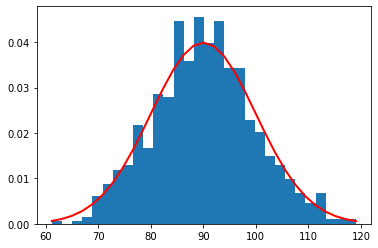

In [395]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [396]:
s2 = np.random.uniform(60,130,1000)

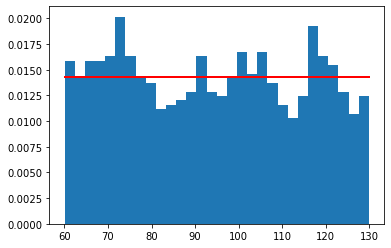

In [397]:
x = np.arange(31, dtype=float)
count, bins, ignored = plt.hist(s2, 30, density=True)
plt.plot(bins, np.full_like(x, 1/(130-60)), linewidth=2, color='r')
plt.show()

In [398]:
df = pd.DataFrame(s, columns = ["Rozkład normalny"])
df2 = pd.DataFrame(s2, columns= ["Rozkład jednostajny"])

In [399]:
df_both = pd.concat([df,df2], axis=1)
df_working_copy = df_both.copy()
df_both.describe()

,Rozkład normalny,Rozkład jednostajny
count,1000.000000,1000.000000
mean,90.129857,94.062175
std,9.551618,20.381951
min,61.177262,60.024951
25%,83.861243,75.483133
50%,89.958795,94.166920
75%,96.344635,112.117586
max,119.076596,129.931428


In [400]:
sample_to_drop = df_working_copy.sample(frac=0.1)
df90 = df_working_copy.drop(sample_to_drop.index)

In [401]:
def print_statistics(data_, label):
    i = 100
    for d in data_:
        i = i-10
        print()
        print('Tabela ' + str(i) + label)
        print(tabulate(d.describe(), headers = ['Nazwa', 'Rozkład normalny', 'Rozkład jednostajny'], tablefmt = 'fancy_grid'))

In [402]:
df80 = df90.drop(df90.sample(100).index)
df70 = df80.drop(df80.sample(100).index)
df60 = df70.drop(df70.sample(100).index)
df50 = df60.drop(df60.sample(100).index)
df40 = df50.drop(df50.sample(100).index)
df30 = df40.drop(df40.sample(100).index)
df20 = df30.drop(df30.sample(100).index)
df_dropped = [df90, df80, df70, df60, df50, df40, df30, df20]
print_statistics(df_dropped, "%")


Tabela 90%
╒═════════╤════════════════════╤═══════════════════════╕
│ Nazwa   │   Rozkład normalny │   Rozkład jednostajny │
╞═════════╪════════════════════╪═══════════════════════╡
│ count   │          900       │              900      │
├─────────┼────────────────────┼───────────────────────┤
│ mean    │           90.149   │               94.1443 │
├─────────┼────────────────────┼───────────────────────┤
│ std     │            9.42822 │               20.4599 │
├─────────┼────────────────────┼───────────────────────┤
│ min     │           61.1773  │               60.025  │
├─────────┼────────────────────┼───────────────────────┤
│ 25%     │           83.9154  │               75.4831 │
├─────────┼────────────────────┼───────────────────────┤
│ 50%     │           89.968   │               94.4012 │
├─────────┼────────────────────┼───────────────────────┤
│ 75%     │           96.3703  │              112.465  │
├─────────┼────────────────────┼───────────────────────┤
│ max     │        

In [403]:
def fill_df_with_mean(data_):
    return data_.append(pd.DataFrame({
                                      'Rozkład normalny': np.full(1000-len(data_),data_['Rozkład normalny'].mean()),
                                      'Rozkład jednostajny': np.full(1000-len(data_),data_['Rozkład jednostajny'].mean())
                                     })
                       )

In [404]:
df90_mean = fill_df_with_mean(df90)
df80_mean = fill_df_with_mean(df80)
df70_mean = fill_df_with_mean(df70)
df60_mean = fill_df_with_mean(df60)
df50_mean = fill_df_with_mean(df50)
df40_mean = fill_df_with_mean(df40)
df30_mean = fill_df_with_mean(df30)
df20_mean = fill_df_with_mean(df20)
df_mean = [df90_mean, df80_mean, df70_mean, df60_mean, df50_mean, df40_mean, df30_mean, df20_mean]
print_statistics(df_mean, "% + uzupełnienie średnią")


Tabela 90% + uzupełnienie średnią
╒═════════╤════════════════════╤═══════════════════════╕
│ Nazwa   │   Rozkład normalny │   Rozkład jednostajny │
╞═════════╪════════════════════╪═══════════════════════╡
│ count   │          1000      │             1000      │
├─────────┼────────────────────┼───────────────────────┤
│ mean    │            90.149  │               94.1443 │
├─────────┼────────────────────┼───────────────────────┤
│ std     │             8.9439 │               19.4089 │
├─────────┼────────────────────┼───────────────────────┤
│ min     │            61.1773 │               60.025  │
├─────────┼────────────────────┼───────────────────────┤
│ 25%     │            84.6498 │               76.9915 │
├─────────┼────────────────────┼───────────────────────┤
│ 50%     │            90.149  │               94.1443 │
├─────────┼────────────────────┼───────────────────────┤
│ 75%     │            95.6111 │              109.621  │
├─────────┼────────────────────┼─────────────────────

In [405]:
def fill_df_with_median(data_):
    return data_.append(pd.DataFrame({
                                      'Rozkład normalny': np.full(1000-len(data_),data_['Rozkład normalny'].median()),
                                      'Rozkład jednostajny': np.full(1000-len(data_),data_['Rozkład jednostajny'].median())
                                     })
                       )

In [406]:
df90_median = fill_df_with_median(df90)
df80_median = fill_df_with_median(df80)
df70_median = fill_df_with_median(df70)
df60_median = fill_df_with_median(df60)
df50_median = fill_df_with_median(df50)
df40_median = fill_df_with_median(df40)
df30_median = fill_df_with_median(df30)
df20_median = fill_df_with_median(df20)
df_median = [df90_median, df80_median, df70_median, df60_median, df50_median, df40_median, df30_median, df20_median]
print_statistics(df_median, "% + uzupełnienie medianą")


Tabela 90% + uzupełnienie medianą
╒═════════╤════════════════════╤═══════════════════════╕
│ Nazwa   │   Rozkład normalny │   Rozkład jednostajny │
╞═════════╪════════════════════╪═══════════════════════╡
│ count   │         1000       │             1000      │
├─────────┼────────────────────┼───────────────────────┤
│ mean    │           90.1309  │               94.17   │
├─────────┼────────────────────┼───────────────────────┤
│ std     │            8.94407 │               19.409  │
├─────────┼────────────────────┼───────────────────────┤
│ min     │           61.1773  │               60.025  │
├─────────┼────────────────────┼───────────────────────┤
│ 25%     │           84.6498  │               76.9915 │
├─────────┼────────────────────┼───────────────────────┤
│ 50%     │           89.968   │               94.4012 │
├─────────┼────────────────────┼───────────────────────┤
│ 75%     │           95.6111  │              109.621  │
├─────────┼────────────────────┼─────────────────────

In [407]:
def fill_df_with_random_numbers(data_):
    return data_.append(pd.DataFrame({
                                      'Rozkład normalny': np.random.normal(mu, sigma, 1000-len(data_)),
                                      'Rozkład jednostajny': np.random.uniform(data_['Rozkład jednostajny'].min(),data_['Rozkład jednostajny'].max(),1000-len(data_))
                                     })
                       )

In [408]:
df90_random = fill_df_with_random_numbers(df90)
df80_random = fill_df_with_random_numbers(df80)
df70_random = fill_df_with_random_numbers(df70)
df60_random = fill_df_with_random_numbers(df60)
df50_random = fill_df_with_random_numbers(df50)
df40_random = fill_df_with_random_numbers(df40)
df30_random = fill_df_with_random_numbers(df30)
df20_random = fill_df_with_random_numbers(df20)
df_random = [df90_random, df80_random, df70_random, df60_random, df50_random, df40_random, df30_random, df20_random]
print_statistics(df_random, "% + uzupełnienie losowymi wartościami")


Tabela 90% + uzupełnienie losowymi wartościami
╒═════════╤════════════════════╤═══════════════════════╕
│ Nazwa   │   Rozkład normalny │   Rozkład jednostajny │
╞═════════╪════════════════════╪═══════════════════════╡
│ count   │         1000       │             1000      │
├─────────┼────────────────────┼───────────────────────┤
│ mean    │           90.144   │               94.2502 │
├─────────┼────────────────────┼───────────────────────┤
│ std     │            9.43295 │               20.415  │
├─────────┼────────────────────┼───────────────────────┤
│ min     │           61.1773  │               60.025  │
├─────────┼────────────────────┼───────────────────────┤
│ 25%     │           83.8612  │               75.782  │
├─────────┼────────────────────┼───────────────────────┤
│ 50%     │           89.9588  │               94.5104 │
├─────────┼────────────────────┼───────────────────────┤
│ 75%     │           96.3703  │              112.568  │
├─────────┼────────────────────┼────────

In [409]:
def get_mean_std_normal(data_):
    data_mean = [d['Rozkład normalny'].mean() for d in data_]
    data_mean.reverse()
    data_mean.append(df_both['Rozkład normalny'].mean())
    data_std = [d['Rozkład normalny'].std() for d in data_]
    data_std.reverse()
    data_std.append(df_both['Rozkład normalny'].std())
    return data_mean, data_std

In [410]:
def get_mean_std_uniform(data_):
    data_mean = [d['Rozkład jednostajny'].mean() for d in data_]
    data_mean.reverse()
    data_mean.append(df_both['Rozkład jednostajny'].mean())
    data_std = [d['Rozkład jednostajny'].std() for d in data_]
    data_std.reverse()
    data_std.append(df_both['Rozkład jednostajny'].std())
    return data_mean, data_std

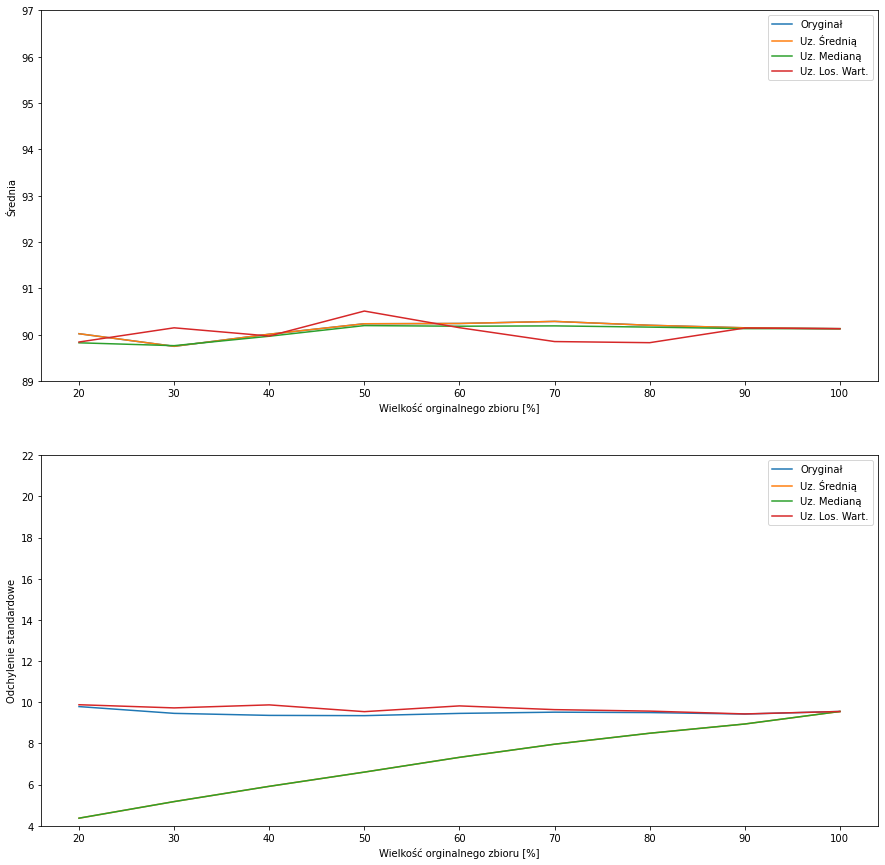

In [411]:
x = ['20', '30', '40','50','60','70','80','90','100']
df_dropped_mean, df_dropped_std = get_mean_std_normal(df_dropped)
df_mean_mean, df_mean_std = get_mean_std_normal(df_mean)
df_median_mean, df_median_std = get_mean_std_normal(df_median)
df_random_mean, df_random_std = get_mean_std_normal(df_random)

f = plt.figure(figsize=(15,15))
ax = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax.plot(x, df_dropped_mean, label = "Oryginał")
ax.plot(x, df_mean_mean, label = "Uz. Średnią")
ax.plot(x, df_median_mean, label = "Uz. Medianą")
ax.plot(x, df_random_mean, label = "Uz. Los. Wart.")
ax.set_xlabel("Wielkość orginalnego zbioru [%]")
ax.set_ylabel("Średnia")
ax.set_ylim([89,97])
ax.legend()

ax2.plot(x, df_dropped_std, label = "Oryginał")
ax2.plot(x, df_mean_std, label = "Uz. Średnią")
ax2.plot(x, df_median_std, label = "Uz. Medianą")
ax2.plot(x, df_random_std, label = "Uz. Los. Wart.")
ax2.set_xlabel("Wielkość orginalnego zbioru [%]")
ax2.set_ylabel("Odchylenie standardowe")
ax2.set_ylim([4,22])
ax2.legend()

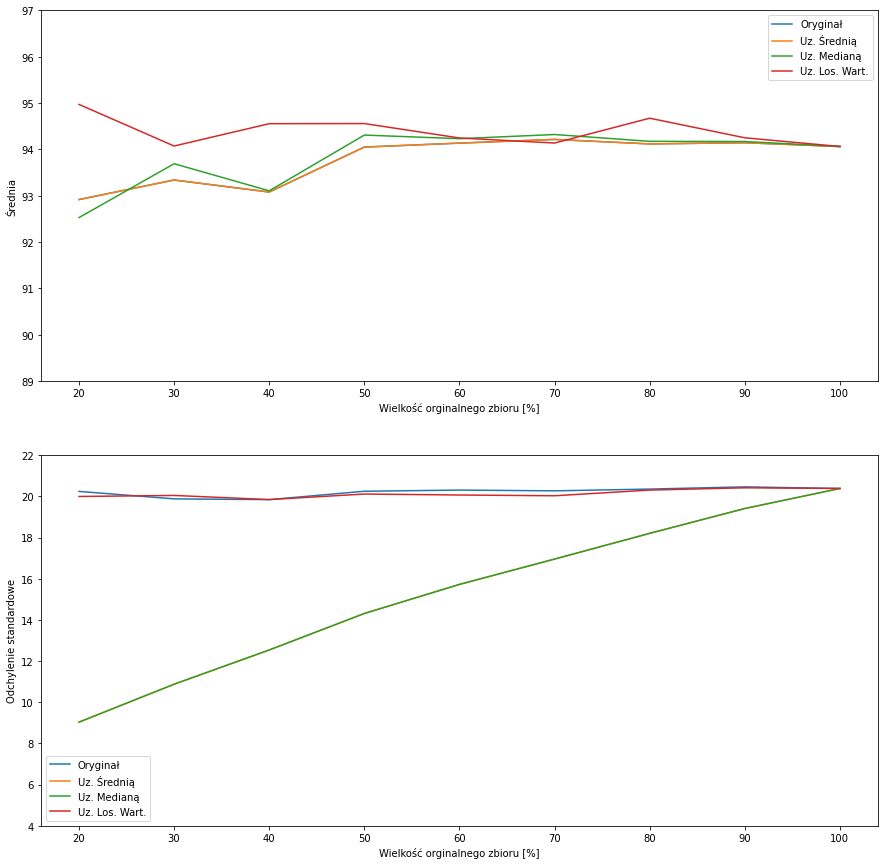

In [412]:
x = ['20', '30', '40','50','60','70','80','90','100']
df_dropped_mean, df_dropped_std = get_mean_std_uniform(df_dropped)
df_mean_mean, df_mean_std = get_mean_std_uniform(df_mean)
df_median_mean, df_median_std = get_mean_std_uniform(df_median)
df_random_mean, df_random_std = get_mean_std_uniform(df_random)

f = plt.figure(figsize=(15,15))
ax = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax.plot(x, df_dropped_mean, label = "Oryginał")
ax.plot(x, df_mean_mean, label = "Uz. Średnią")
ax.plot(x, df_median_mean, label = "Uz. Medianą")
ax.plot(x, df_random_mean, label = "Uz. Los. Wart.")
ax.set_xlabel("Wielkość orginalnego zbioru [%]")
ax.set_ylabel("Średnia")
ax.set_ylim([89,97])
ax.legend()

ax2.plot(x, df_dropped_std, label = "Oryginał")
ax2.plot(x, df_mean_std, label = "Uz. Średnią")
ax2.plot(x, df_median_std, label = "Uz. Medianą")
ax2.plot(x, df_random_std, label = "Uz. Los. Wart.")
ax2.set_xlabel("Wielkość orginalnego zbioru [%]")
ax2.set_ylabel("Odchylenie standardowe")
ax2.set_ylim([4,22])
ax2.legend()

Text(0.5, 0, 'Wielkość orginalnego zbioru [%] z uzupełnieniem średnią')

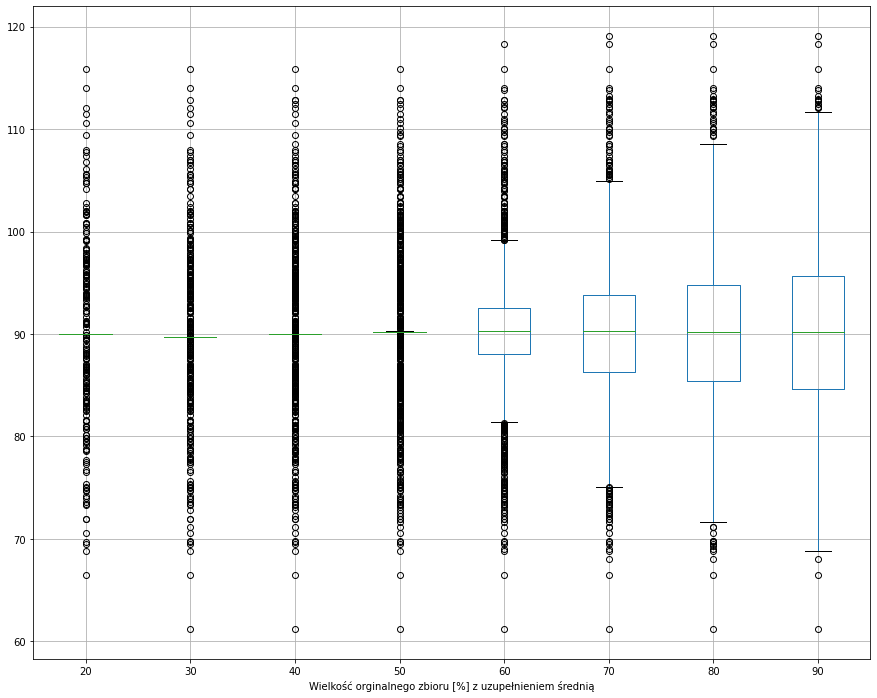

In [413]:
df_mean_normal = [df_['Rozkład normalny'].copy() for df_ in df_mean]
for df_ in df_mean_normal:
    df_.index = range(1, len(df_) + 1)

df_mean_normal.reverse()
df_mean_normal_merged = pd.concat(df_mean_normal, axis = 1)
df_mean_normal_merged.columns = ['20', '30', '40','50','60','70','80','90']
ax = df_mean_normal_merged.boxplot(column = ['20', '30', '40','50','60','70','80','90'], figsize = [15,12])
ax.set_xlabel("Wielkość orginalnego zbioru [%] z uzupełnieniem średnią")

Text(0.5, 0, 'Wielkość orginalnego zbioru [%] z uzupełnieniem medianą')

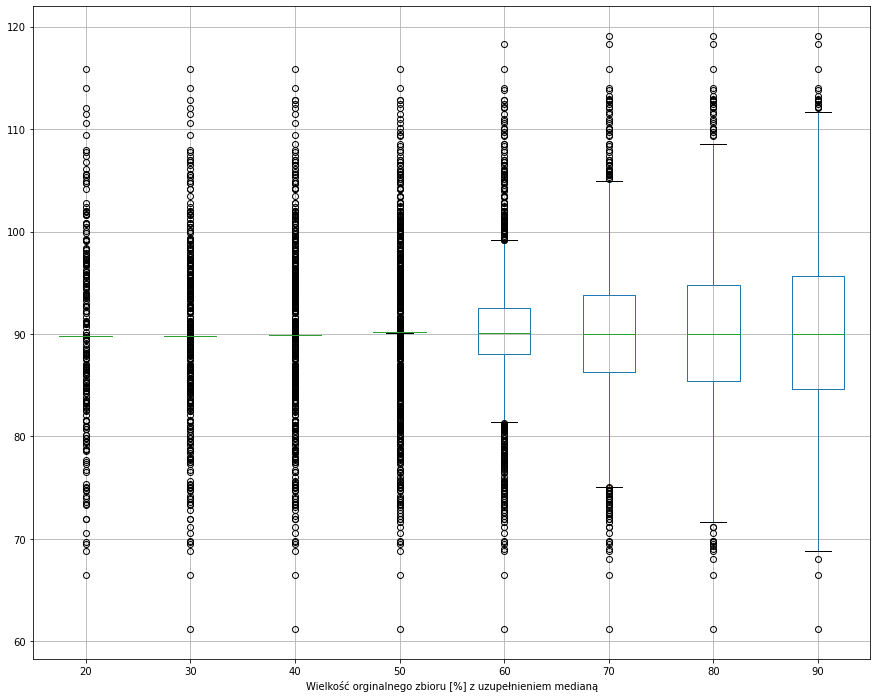

In [414]:
df_median_normal = [df_['Rozkład normalny'].copy() for df_ in df_median]
for df_ in df_median_normal:
    df_.index = range(1, len(df_) + 1)

df_median_normal.reverse()
df_median_normal_merged = pd.concat(df_median_normal, axis = 1)
df_median_normal_merged.columns = ['20', '30', '40','50','60','70','80','90']
ax = df_median_normal_merged.boxplot(column = ['20', '30', '40','50','60','70','80','90'], figsize = [15,12])
ax.set_xlabel("Wielkość orginalnego zbioru [%] z uzupełnieniem medianą")

Text(0.5, 0, 'Wielkość orginalnego zbioru [%] z uzupełnieniem wartościami losowymi')

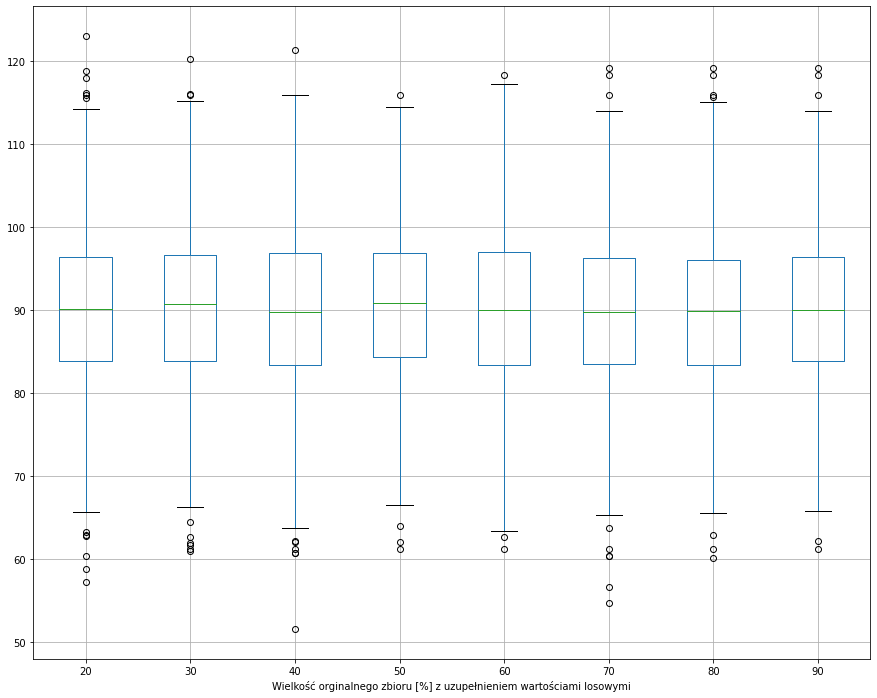

In [415]:
df_random_normal = [df_['Rozkład normalny'].copy() for df_ in df_random]
for df_ in df_random_normal:
    df_.index = range(1, len(df_) + 1)

df_random_normal.reverse()
df_random_normal_merged = pd.concat(df_random_normal, axis = 1)
df_random_normal_merged.columns = ['20', '30', '40','50','60','70','80','90']
ax = df_random_normal_merged.boxplot(column = ['20', '30', '40','50','60','70','80','90'], figsize = [15,12])
ax.set_xlabel("Wielkość orginalnego zbioru [%] z uzupełnieniem wartościami losowymi")

Text(0.5, 0, 'Wielkość orginalnego zbioru [%] z uzupełnieniem średnią')

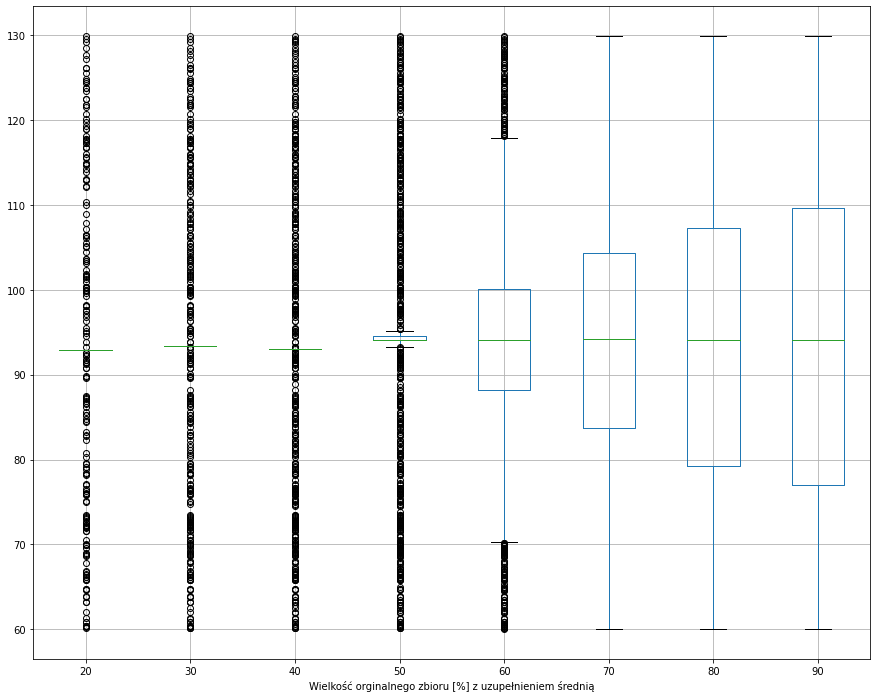

In [416]:
df_mean_uniform = [df_['Rozkład jednostajny'].copy() for df_ in df_mean]
for df_ in df_mean_uniform:
    df_.index = range(1, len(df_) + 1)

df_mean_uniform.reverse()
df_mean_uniform_merged = pd.concat(df_mean_uniform, axis = 1)
df_mean_uniform_merged.columns = ['20', '30', '40','50','60','70','80','90']
ax = df_mean_uniform_merged.boxplot(column = ['20', '30', '40','50','60','70','80','90'], figsize = [15,12])
ax.set_xlabel("Wielkość orginalnego zbioru [%] z uzupełnieniem średnią")

Text(0.5, 0, 'Wielkość orginalnego zbioru [%] z uzupełnieniem medianą')

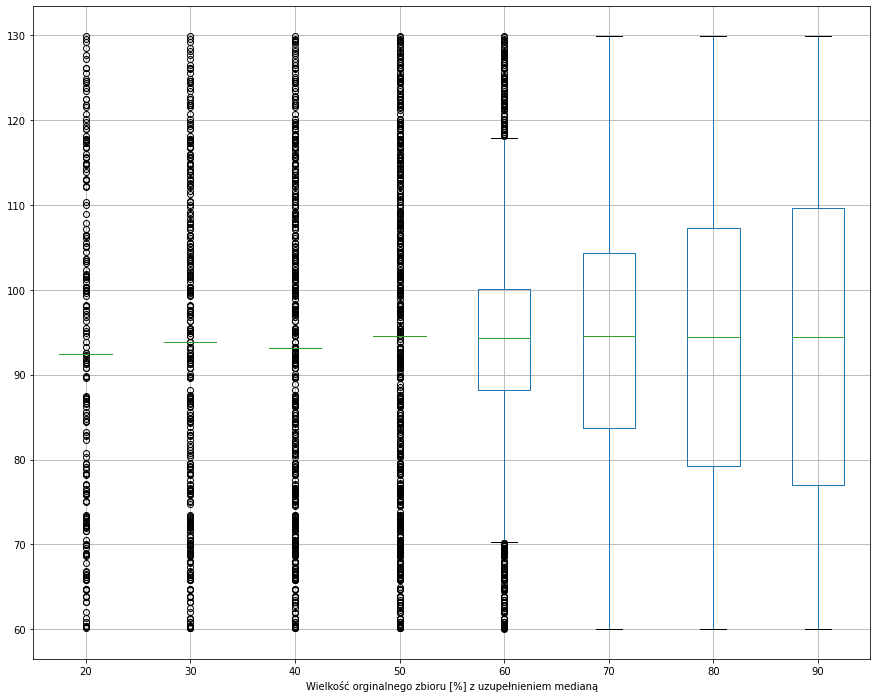

In [417]:
df_median_uniform = [df_['Rozkład jednostajny'].copy() for df_ in df_median]
for df_ in df_median_uniform:
    df_.index = range(1, len(df_) + 1)

df_median_uniform.reverse()
df_median_uniform_merged = pd.concat(df_median_uniform, axis = 1)
df_median_uniform_merged.columns = ['20', '30', '40','50','60','70','80','90']
ax = df_median_uniform_merged.boxplot(column = ['20', '30', '40','50','60','70','80','90'], figsize = [15,12])
ax.set_xlabel("Wielkość orginalnego zbioru [%] z uzupełnieniem medianą")

Text(0.5, 0, 'Wielkość orginalnego zbioru [%] z uzupełnieniem wartościami losowymi')

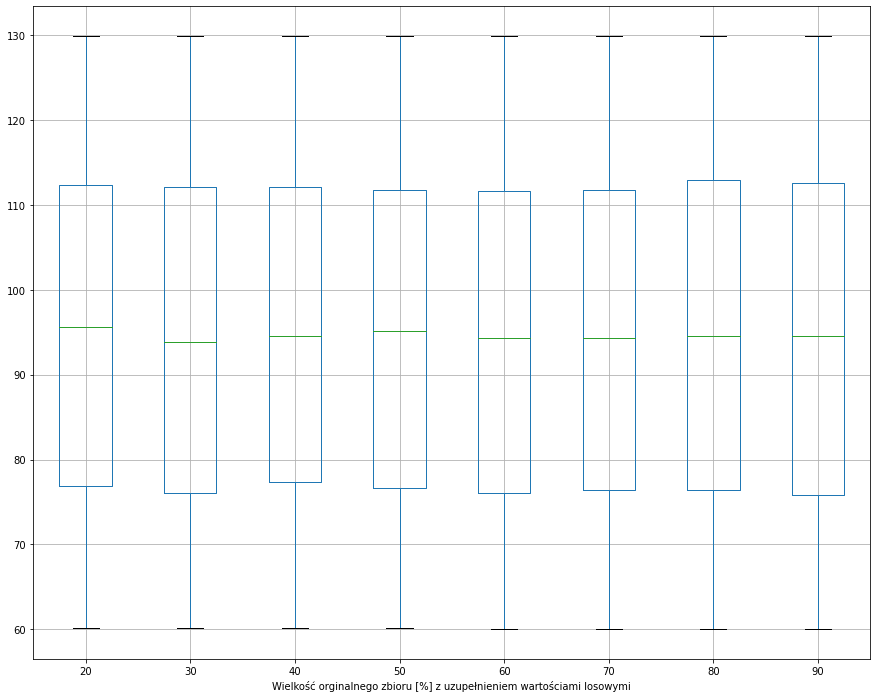

In [418]:
df_random_uniform = [df_['Rozkład jednostajny'].copy() for df_ in df_random]
for df_ in df_random_uniform:
    df_.index = range(1, len(df_) + 1)

df_random_uniform.reverse()
df_random_uniform_merged = pd.concat(df_random_uniform, axis = 1)
df_random_uniform_merged.columns = ['20', '30', '40','50','60','70','80','90']
ax = df_random_uniform_merged.boxplot(column = ['20', '30', '40','50','60','70','80','90'], figsize = [15,12])
ax.set_xlabel("Wielkość orginalnego zbioru [%] z uzupełnieniem wartościami losowymi")